## Контрольная работа 4 Вариант 5

### Задача 1 Численное дифференцирование (1.5 балла)

Для вектор-функции $f(x, y)=\left(f_1(x, y), \; f_2(x, y)\right)=\left(x^2+y^2, \; x^2-y^2\right)$:

- Построить её векторное поле на плоскости
- Численно вычислить дивергенцию данного векторного поля при нескольких одинаковых шагах $h$ и построить её график при каком-то конкретном шаге
- Построить график ошибки относительно аналитического решения в зависимости от шага h. Какой экспериментальный порядок аппроксимации получился?

>__Примечание.__ Векторное поле можно построить по аналогии с этим кодом:

>`x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))`
>
>`u = -x/np.sqrt(x\**2 + y\**2)`
>
>`v = y/np.sqrt(x\**2 + y\**2)`
>
>`plt.quiver(x,y,u,v)`
>
>`plt.show()`


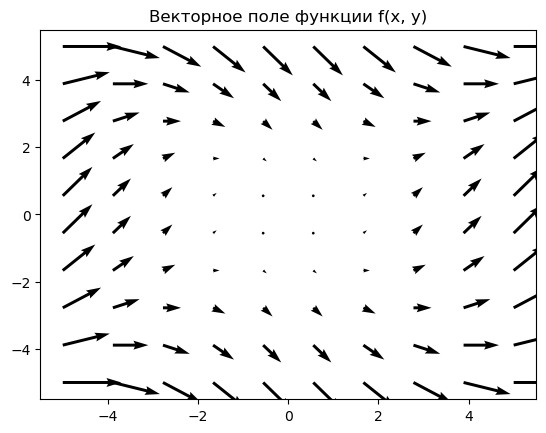

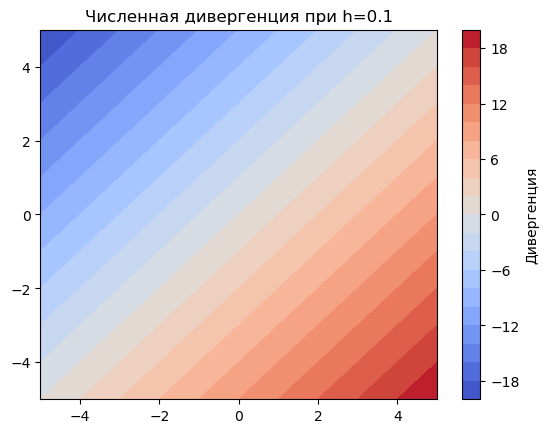

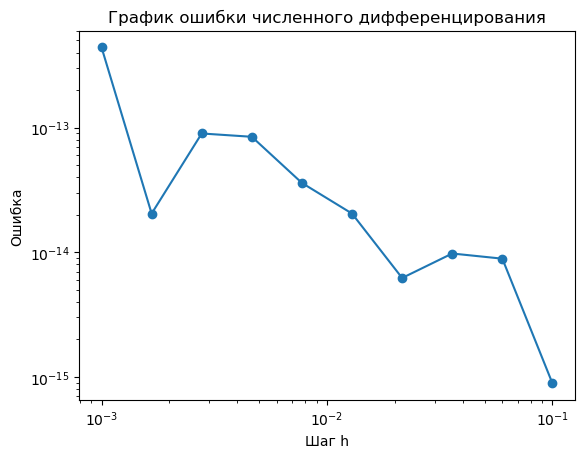

Экспериментальный порядок аппроксимации: 0.96


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import linregress

def f1(x, y):
    return x**2 + y**2

def f2(x, y):
    return x**2 - y**2

x, y = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
u = f1(x, y)
v = f2(x, y)

plt.quiver(x, y, u, v)
plt.title("Векторное поле функции f(x, y)")
plt.show()


def divergence(f1, f2, x, y, h):
    df1_dx = (f1(x + h, y) - f1(x - h, y)) / (2 * h)
    df2_dy = (f2(x, y + h) - f2(x, y - h)) / (2 * h)
    return df1_dx + df2_dy

h_fixed = 0.1
x_vals = np.linspace(-5, 5, 20)
y_vals = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_vals, y_vals)
Div = np.vectorize(lambda x, y: divergence(f1, f2, x, y, h_fixed))(X, Y)

plt.contourf(X, Y, Div, levels=20, cmap='coolwarm')
plt.colorbar(label='Дивергенция')
plt.title(f"Численная дивергенция при h={h_fixed}")
plt.show()

hs = np.logspace(-3, -1, 10)
errors = []
div_values = []

for h in hs:
    num_div = divergence(f1, f2, 2, 0, h) 
    true_div = 4
    errors.append(abs(num_div - true_div))
    div_values.append(num_div)

plt.loglog(hs, errors, marker='o')
plt.xlabel("Шаг h")
plt.ylabel("Ошибка")
plt.title("График ошибки численного дифференцирования")
plt.show()

slope, intercept, _, _, _ = linregress(np.log(hs), np.log(errors))
print(f"Экспериментальный порядок аппроксимации: {-slope:.2f}") # получился линейный


### Задача 2  Численное интегрирование (4 балла)

Вычислить несобственный интеграл с точностью $10^{-4}$ (Оценивать точность алгоритмом Рунге):

a) $\int_0^1 \frac{d x}{(1+x) \sqrt{x}}$

б) $\int_0^1 \frac{\cos x}{\sqrt{x}} d x$


In [78]:
def f_a(x):
    return 1 / ((1 + x) * np.sqrt(x))

def f_b(x):
    return np.cos(x) / np.sqrt(x)

def simpson(f, h):
    assert (len(f)-1) % 2 == 0
    return h/3. * (f[0] + 4 * sum(f[1:-1:2]) + \
                   2 * sum(f[2:-2:2]) + f[-1])

def runge(f, a, b, eps=1e-4):    
    n = 4
    Ih = simpson(f(np.linspace(a, b, n+1)), (b-a) / n)
    while True:
        Ih_2 = simpson(f(np.linspace(a, b, 2*n+1)), (b-a) / (2*n))
        Dh_2 = (Ih - Ih_2) / (2**2 - 1)
        print('I(h) = %.16f, err(h) = %.6e' % (Ih_2, Dh_2))
        if abs(Dh_2) < eps:
            break
        n *= 2; Ih = Ih_2
        if n > 10000: print('Too large n'); break
    return Ih_2

In [79]:
runge(f_a, 0.0001, 1)

I(h) = 5.2949167285838952, err(h) = 1.329534e+00
I(h) = 3.3397738170614875, err(h) = 6.517143e-01
I(h) = 2.3894052107067107, err(h) = 3.167895e-01
I(h) = 1.9332161060957840, err(h) = 1.520630e-01
I(h) = 1.7183585092252520, err(h) = 7.161920e-02
I(h) = 1.6200668050074856, err(h) = 3.276390e-02
I(h) = 1.5770959757442218, err(h) = 1.432361e-02
I(h) = 1.5596117806042673, err(h) = 5.828065e-03
I(h) = 1.5532642671571690, err(h) = 2.115838e-03
I(h) = 1.5513343685721657, err(h) = 6.432995e-04
I(h) = 1.5508819171005890, err(h) = 1.508172e-04
I(h) = 1.5508064464771252, err(h) = 2.515687e-05


1.5508064464771252

In [81]:
runge(f_b, 0.0001, 1)

I(h) = 5.5298496825134977, err(h) = 1.327279e+00
I(h) = 3.5769287855357250, err(h) = 6.509736e-01
I(h) = 2.6272982932739435, err(h) = 3.165435e-01
I(h) = 2.1713532734008476, err(h) = 1.519817e-01
I(h) = 1.9565749366569634, err(h) = 7.159278e-02
I(h) = 1.8583081485559658, err(h) = 3.275560e-02
I(h) = 1.8153447641011309, err(h) = 1.432113e-02
I(h) = 1.7978626287823116, err(h) = 5.827378e-03
I(h) = 1.7915156234565797, err(h) = 2.115668e-03
I(h) = 1.7895858309418398, err(h) = 6.432642e-04
I(h) = 1.7891333970733407, err(h) = 1.508113e-04
I(h) = 1.7890579286528485, err(h) = 2.515614e-05


1.7890579286528485

### Задача 3  Интерполяция (2 балла)

Дана таблица значений полинома 2-й степени:

| $x$ | -2 | -1 | 0 | 1 | 2 |
| :---: | ---: | ---: | ---: | ---: | ---: |
| $f(x)$ | 7 | 3 | 1 | 0 | 3 |

Известно, что во второй строке содержится ровно одна ошибка. Найти ошибку, исправить ее и восстановить исходный полином.

In [38]:
from numpy.polynomial.polynomial import Polynomial

x_values = np.array([-2, -1, 0, 1, 2])
y_values = np.array([7, 3, 1, 0, 3])

poly = Polynomial.fit(x_values, y_values, 2).convert()
print(f"Полином до исправления: {poly}")

correct_values = poly(x_values)
errors = np.abs(correct_values - y_values)
print("Ошибки:",errors)

Полином до исправления: 0.6571428571428584 - 1.1000000000000005·x¹ + 1.0714285714285707·x²
Ошибки: [0.14285714 0.17142857 0.34285714 0.62857143 0.25714286]


In [34]:
# видно, что полином не имеет точных коэффицентов=> где-то есть ошибка. Из вида приближенного полинома предположим, что a=1, b=-1, c=1
for x, y in zip(x_values, y_values):
    diff = (x**2-x+1) - y 
    print(diff)
#есть одна ошибка-наше предположение верно. исправим ее. вместо y=0, должно быть y=1

0
0
0
1
0


In [45]:
y_values_new = np.array([7, 3, 1, 1, 3])
corrected_poly = Polynomial.fit(x_values, y_values_new, 2).convert()
print(f"Исправленный полином: {corrected_poly}")

Исправленный полином: 1.0000000000000009 - 1.0000000000000002·x¹ + 0.9999999999999994·x²


### Задача 4  Ряды (1 балл)

Найдите сумму ряда

$$
\sum_{n=0}^{\infty} \frac{(-1)^n(n+1)}{(n+2) \cdot n ! \cdot 2^{n-1}}
$$

с точностью $\varepsilon=10^{-6}$. Обоснуйте, почему исходная точность достигнута.


In [52]:
epsilon = 1e-6

n = 0
sum_series = 0
term = 1 

while abs(term) > epsilon:
    term = ((-1)**n * (n+1)) / ((n+2) * np.math.factorial(n) * 2**(n-1))
    sum_series += term
    n += 1

print("Сумма:", sum_series)
print("последний добавленный член:", term) #тк он меньше epsilon, то точность достигнута

Сумма: 0.4914292452911432
последний добавленный член: 1.7438616071428571e-07


### Задача 5  Дискретное преобразование Фурье (1.5 балла)

Построить графики дискретного преобразования Фурье для

$$
x(k)=\left\{\begin{array}{c}
\cos \left(\frac{2 \pi}{N} k\right), \quad 0 \leq k \leq N-1, \\
0, \quad \text { при других } k .
\end{array}\right.
$$

при $N=16, \; 32, \; 64, \; 128$.

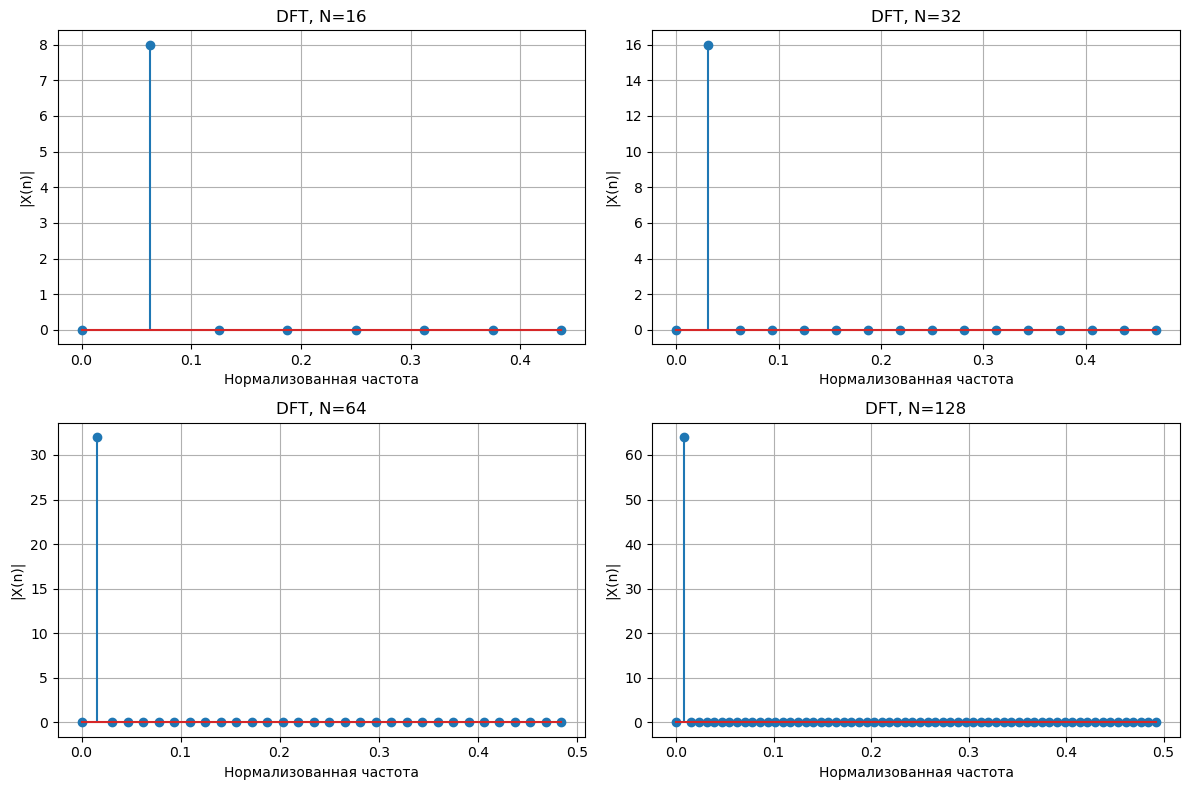

In [82]:
def plot_dft(N_values):
    plt.figure(figsize=(12, 8))
    
    for i, N in enumerate(N_values):
        k = np.arange(N)
        x_k = np.cos(2 * np.pi * k / N)  
        
        X_n = np.fft.fft(x_k) 
        freq = np.fft.fftfreq(N)  
        
        plt.subplot(2, 2, i+1)
        plt.stem(freq[:N//2], np.abs(X_n)[:N//2])
        plt.title(f'DFT, N={N}')
        plt.xlabel('Нормализованная частота')
        plt.ylabel('|X(n)|')
        plt.grid()

    plt.tight_layout()
    plt.show()

plot_dft([16, 32, 64, 128])
